# CMPT 898: Assigment 3 Solutions
## By Samuel Horovatin, sch923, 11185403

### 1. Baseline network: *You can start with a LeNet-5 style architecture that we discussed in the lecture. As a baseline start with ReLU activations for the hidden layers, and a softmax output layer.*

In [1]:
import tensorflow as tf
import numpy as np
import os, datetime
import math

# Hyper-parameters that remain constant throughout all questions
EPOCHS = 10
BATCH = 256
OPTIMIZER = 'adam'
LOSS = 'sparse_categorical_crossentropy'
METRICS = 'accuracy'

# Grab the Cifar10 dataset, which is a color image database consisiting of 
# 10 different classes representing airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Normalization of x_train and x_test and split into training dataset and testing dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

KeyboardInterrupt: 

In [4]:
# Trains the model given the constant parameters and returns the model and the fit history
def train_model(model):
  model.compile(optimizer=OPTIMIZER,
                loss=LOSS,
                metrics=[METRICS])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  history = model.fit(x=x_train, 
                      y=y_train, 
                      epochs=EPOCHS,
                      batch_size=BATCH, 
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard_callback])
        
  return (model, history)

In [5]:
# LeNet-5 as described in the lecture notes
def create_baseline_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

train_model(create_baseline_model())

Epoch 1/10
  1/196 [..............................] - ETA: 0s - loss: 2.3434 - accuracy: 0.0859WARNING:tensorflow:From G:\Users\shoro\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
196/196 [==============================] - 2s 10ms/step - loss: 1.8289 - accuracy: 0.3343 - val_loss: 1.6013 - val_accuracy: 0.4163
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 1.5228 - accuracy: 0.4516 - val_loss: 1.5795 - val_accuracy: 0.4311
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 1.4122 - accuracy: 0.4955 - val_loss: 1.3718 - val_accuracy: 0.5045
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 1.3164 - accuracy: 0.5328 - val_loss: 1.3453 - val_accuracy: 0.5255
Epoch 5/10
196/196 [============================

(<tensorflow.python.keras.engine.sequential.Sequential at 0x190739b3348>,
 <tensorflow.python.keras.callbacks.History at 0x19079fd8608>)

### 2. Add L2 weight decay regularization: *Add an L2-norm penalty on the weights of your baseline model as regularization. Test two different regularization strengths.*

In [6]:
# A model that applies an regularization function at a specific strength at every layer
# Reused by both question 2 and 3
def create_regularized_model(regularizer, reg_strength):
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3), 
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        120,
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.Dense(
        84,
        activation='relu',
        kernel_regularizer=regularizer(reg_strength)),
    tf.keras.layers.Dense(10,
        activation='softmax',
        kernel_regularizer=regularizer(reg_strength))])


In [7]:
LAMBDA1 = 0.001
LAMBDA2 = 0.01

print(f"Training model 1 with L2 regularization and a lambda of {LAMBDA1}")
train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA1))
print(f"Training model 2 with L2 regularization and a lambda of {LAMBDA2}")
train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA2))
%load_ext tensorboard
%tensorboard --logdir logs

Training model 1 with L2 regularization and a lambda of 0.001
Epoch 1/10
196/196 [==============================] - 2s 13ms/step - loss: 1.9909 - accuracy: 0.3416 - val_loss: 1.7141 - val_accuracy: 0.4317
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 1.6396 - accuracy: 0.4579 - val_loss: 1.5882 - val_accuracy: 0.4720
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 1.5394 - accuracy: 0.4951 - val_loss: 1.4991 - val_accuracy: 0.5149
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 1.4801 - accuracy: 0.5202 - val_loss: 1.4450 - val_accuracy: 0.5338
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 1.4229 - accuracy: 0.5405 - val_loss: 1.4235 - val_accuracy: 0.5416
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 1.3806 - accuracy: 0.5585 - val_loss: 1.3832 - val_accuracy: 0.5499
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 1.3574 - ac

Launching TensorBoard...

### 3. Add L1 weight decay regularization: *Add an L1-norm penalty on the weights of your baseline model as regularization. Test two different regularization strengths.*

In [8]:
LAMBDA1 = 0.001
LAMBDA2 = 0.01

print(f"Training model 1 with L1 regularization and a lambda of {LAMBDA1}")
train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA1))
print(f"Training model 2 with L1 regularization and a lambda of {LAMBDA2}")
train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA2))

%load_ext tensorboard
%tensorboard --logdir logs

Training model 1 with L1 regularization and a lambda of 0.001
Epoch 1/10
196/196 [==============================] - 3s 13ms/step - loss: 3.3422 - accuracy: 0.2401 - val_loss: 2.4350 - val_accuracy: 0.3018
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 2.2665 - accuracy: 0.3275 - val_loss: 2.1699 - val_accuracy: 0.3467
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 2.0829 - accuracy: 0.3762 - val_loss: 2.0045 - val_accuracy: 0.3904
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 1.9862 - accuracy: 0.3995 - val_loss: 1.9469 - val_accuracy: 0.4137
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 1.9290 - accuracy: 0.4131 - val_loss: 1.9084 - val_accuracy: 0.4206
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 1.8837 - accuracy: 0.4228 - val_loss: 1.8663 - val_accuracy: 0.4219
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 1.8539 - ac

Launching TensorBoard...

### 4. Remove fully-connected layers: *Modify the architecture to remove the fully-connected layers at the backend of the network. For example, replace with Global Average Pooling or an alternative. Report the change in the number of parameters for this model compared to previous.*


In [9]:
#A model that applies an L1 regularization at every layer
def create_average_pooling_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=6, 
        kernel_size=5, 
        activation='relu', 
        input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=5, 
        activation='relu'),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=5, 
        activation='softmax'), # used as output layer
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten()]) 

print(f"Training model with Global Average Pooling")
train_model(create_average_pooling_model())

%load_ext tensorboard
%tensorboard --logdir logs

Training model with Global Average Pooling
Epoch 1/10
196/196 [==============================] - 2s 13ms/step - loss: 2.0194 - accuracy: 0.2505 - val_loss: 1.8207 - val_accuracy: 0.3460
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 1.7635 - accuracy: 0.3626 - val_loss: 1.6899 - val_accuracy: 0.3905
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 1.6677 - accuracy: 0.3963 - val_loss: 1.6204 - val_accuracy: 0.4252
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 1.6125 - accuracy: 0.4194 - val_loss: 1.5724 - val_accuracy: 0.4385
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 1.5795 - accuracy: 0.4325 - val_loss: 1.5413 - val_accuracy: 0.4504
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 1.5497 - accuracy: 0.4434 - val_loss: 1.5174 - val_accuracy: 0.4515
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 1.5330 - accuracy: 0.4526 - va

Reusing TensorBoard on port 6006 (pid 22568), started 4 days, 1:48:39 ago. (Use '!kill 22568' to kill it.)

### 5. Analyze the accuracy of the different models: *For all six models, train/test your model three times to get a sense of the consistency of the test error. Keep other aspects of your model the same among designs (# epochs, mini-batch size, hyperparameters). Generate a table that summarizes the training error, test error, standard deviation of test error across three runs, inference time, and \# of parameters for each model.*

In [10]:
# Training for 6 models of 10 epochs each takes a long time, so actual tabulation is done in another code block

# Chosen based on performance of the above model test for L1 and L2
LAMBDA1 = 0.001
LAMBDA2 = 0.01

model_results = {"baseline":list(),"l2_lambda1":list(),"l1_lambda1":list(),"l2_lambda2":list(),"l1_lambda2":list(),"global_average_pooling":list()}

for i in range(3):
    # Train and store the baseline model results
    print("BASELINE Model Training: ...")
    model_results["baseline"].append(train_model(create_baseline_model()))

    # Train and store the L2 model results with both LAMBDA values
    print("L2 Model Training: ...")
    model_results["l2_lambda1"].append(train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA1)))
    model_results["l2_lambda2"].append(train_model(create_regularized_model(tf.keras.regularizers.l2, LAMBDA2)))

    # Train and store the L1 model results with both LAMBDA values
    print("L1 Model Training: ...")
    model_results["l1_lambda1"].append(train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA1)))
    model_results["l1_lambda2"].append(train_model(create_regularized_model(tf.keras.regularizers.l1, LAMBDA2)))

    # Train and store the global_average_pooling model results
    print("Global Average Pooling Model Training: ...")
    model_results["global_average_pooling"].append(train_model(create_average_pooling_model()))

BASELINE Model Training: ...
Epoch 1/10
196/196 [==============================] - 2s 12ms/step - loss: 1.8678 - accuracy: 0.3238 - val_loss: 1.6604 - val_accuracy: 0.4002
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 1.5437 - accuracy: 0.4472 - val_loss: 1.4917 - val_accuracy: 0.4590
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 1.4303 - accuracy: 0.4883 - val_loss: 1.3878 - val_accuracy: 0.5010
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 1.3483 - accuracy: 0.5175 - val_loss: 1.3364 - val_accuracy: 0.5214
Epoch 5/10
196/196 [==============================] - 1s 8ms/step - loss: 1.3005 - accuracy: 0.5401 - val_loss: 1.2692 - val_accuracy: 0.5480
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 1.2479 - accuracy: 0.5573 - val_loss: 1.2660 - val_accuracy: 0.5484
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 1.2055 - accuracy: 0.5728 - val_loss: 1.2601

Starting table creation...
Currently populating row for [baseline]...
Currently populating row for [l2_lambda1]...
Currently populating row for [l1_lambda1]...
Currently populating row for [l2_lambda2]...
Currently populating row for [l1_lambda2]...
Currently populating row for [global_average_pooling]...


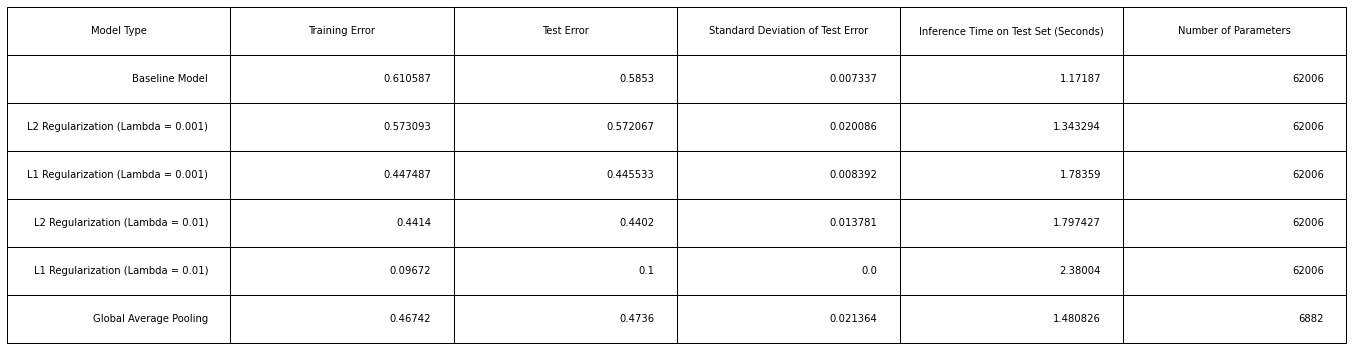

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

# Data assembly
table_label = ("Model Type", "Training Error", "Test Error", "Standard Deviation of Test Error", "Inference Time on Test Set (Seconds)", "Number of Parameters")
table_rows = list()

print("Starting table creation...")
for (key, model_list) in model_results.items():
    row_data = {"training_error" : list(), "test_error" : list(), "inference_time" : list()}

    print(f"Currently populating row for [{key}]...")
    # Gets training accuracy and test accuracy
    for (model, hist) in model_list:
        row_data["training_error"].append(float(hist.history['accuracy'][EPOCHS-1]))
        row_data["test_error"].append(float(hist.history['val_accuracy'][EPOCHS-1]))
        row_data["inference_time"].append(float(model.evaluate(x_test, y_test, verbose=0)[0]))

    # Completely for aesthetic purposes
    nice_keys = {"baseline": "Baseline Model","l2_lambda1": f"L2 Regularization (Lambda = {LAMBDA1})","l1_lambda1":f"L1 Regularization (Lambda = {LAMBDA1})","l2_lambda2": f"L2 Regularization (Lambda = {LAMBDA2})","l1_lambda2": f"L1 Regularization (Lambda = {LAMBDA2})","global_average_pooling": f"Global Average Pooling"}

    # Adds all values to row for table creation 
    table_rows.append((nice_keys[key], 
    round(stat.mean(row_data["training_error"]), 6), 
    round(stat.mean(row_data["test_error"]), 6), 
    round(stat.stdev(row_data["test_error"]), 6), 
    round(stat.mean(row_data["inference_time"]), 6), 
    int(model_results[key][0][0].count_params())
    ))
   
fig, axes = plt.subplots()

fig.patch.set_visible(False)
axes.axis('off')
axes.axis('tight')

table_df = pd.DataFrame(table_rows, columns=table_label)
 
# Plot table with some formatting
table = axes.table(cellText=table_df.values, colLabels=table_df.columns, loc='center')
table.scale(4,4)
plt.show()


### 6. Analyze the weights of the regularized models: *For the baseline model and the four regularized models (from parts 2 and 3: L2 and L1 regularization with two different strengths each) measure the sparsity of the weights in each FC layer and create a bar chart that compares the sparsity between the models in each layer. There are a number of metrics that measure sparsity, e.g. Hoyer's index. For different sparsity metrics, see Table I in https://arxiv.org/abs/0811.4706*

[0.2448789844805742, 0.22850989236269528, 0.3346346839830952, 0.2467663730010325, 0.21127798860974048, 0.37139333645358424, 0.2120425081031188, 0.08361307925913805, 0.41070024770488095, 0.22924351441001425, 0.16365609091647298, 0.42808420206588016, 0.2885429724468146, 0.14531922034621014, 0.402738891144417]


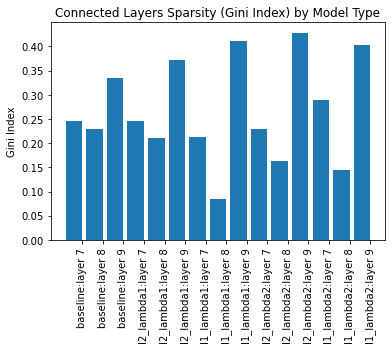

In [18]:
# Gini Index as described in https://github.com/oliviaguest/gini/blob/master/gini.py. Expects a tf.Variable of weights as input
def gini_index(weight_vect):
    flat_weight = tf.keras.backend.flatten(weight_vect).numpy()

    # Remove negative values
    if np.amin(flat_weight) < 0:
        flat_weight -= np.amin(flat_weight)

    # Gini index cannot work with values of 0
    flat_weight += 0.0000001

    sorted_weight = np.sort(flat_weight)
    N = len(sorted_weight)
    i = np.arange(1, N+1)
    
    return ((np.sum((2 * i - N - 1) * sorted_weight)) / (N * np.sum(sorted_weight))) 

# Gini Index as described in https://github.com/oliviaguest/gini/blob/master/gini.py. Expects a tf.Variable of weights as input
def gini_index2(weight_vect):
    flat_weight = tf.keras.backend.flatten(weight_vect).numpy()

    # Remove negative values
    if np.amin(flat_weight) < 0:
        flat_weight -= np.amin(flat_weight)

    # Gini index cannot work with values of 0
    flat_weight += 0.0000001

    sorted_weight = np.sort(flat_weight)
    N = len(sorted_weight)
    i = np.arange(1, N+1)
    
    return 1 - 2*((np.sum(sorted_weight / np.linalg.norm(sorted_weight, ord=1))) / ((N - i + 0.5)/N)) 

# This max depth will be the same for all models
max_connected_depth = len(model_results[key][0][0].weights)

# Min depth is found using magic number 3. This comes from the number of fully connected layers at the end of each network
min_connected_depth = max_connected_depth - 3

plt_labels = list()
plt_vals = list()

# Collects values for figure, skipping global average pooling
for key, model_tuple in model_results.items():
    model = model_tuple[0][0]
    if key == 'global_average_pooling':
        continue
    for i in range(min_connected_depth, max_connected_depth):
        plt_labels.append(f"{key}:layer {i}")
        plt_vals.append(gini_index(model.weights[i]))

print(plt_vals)
plt.figure()
barwidth= 0.8
plt.bar(np.arange(len(plt_vals)),plt_vals, barwidth)
plt.gca().set_xticks(np.arange(len(plt_vals))+barwidth/2.)
plt.gca().set_xticklabels(plt_labels)
plt.xticks(rotation='vertical')
plt.gca().set(title='Connected Layers Sparsity (Gini Index) by Model Type', ylabel='Gini Index')
plt.show()